## Exploratory Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime
from time import time

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# read training data 
train = pd.read_csv("data/train.csv")
train.sort_values(by="Date", ascending = True, inplace = True)

# use data only when sales are greated than 0
train = train[train.Sales > 0]

# merge extra data from store to train set
store = pd.read_csv("data/store.csv")
data = pd.merge(train, store, on = 'Store')

# read and merge extra data from store to test set
temp = pd.read_csv("data/test.csv")
test = pd.merge(temp, store, on = 'Store')

In [5]:
data.shape

(844338, 18)

In [6]:
test.shape

(41088, 17)

Check for number of Null instances 

In [7]:
data.apply(lambda x: sum(x.isnull()), axis = 0)
#data.describe()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268600
CompetitionOpenSinceYear     268600
Promo2                            0
Promo2SinceWeek              423292
Promo2SinceYear              423292
PromoInterval                423292
dtype: int64

In [8]:
test.apply(lambda x: sum(x.isnull()), axis = 0)

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

In [9]:
len(data[data.Open == 0])

0

In [10]:
len(test[test.Open == 0])

5984

In [11]:
# Take care of null values
test.loc[(test.Open.isnull()), 'Open'] = 1
data.loc[(data.CompetitionDistance.isnull()), 'CompetitionDistance'] = data['CompetitionDistance'].mean()
test.loc[(test.CompetitionDistance.isnull()), 'CompetitionDistance'] = data['CompetitionDistance'].mean()

In [12]:
data.head().T

,0,1,2,3,4
Store,353,353,353,353,353
DayOfWeek,2,3,4,5,6
Date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05
Sales,3139,2686,2628,2677,2224
Customers,820,835,815,856,719
Open,1,1,1,1,1
Promo,0,0,0,0,0
StateHoliday,a,0,0,0,0
SchoolHoliday,1,1,1,1,0
StoreType,b,b,b,b,b


Lets look at average sales and standard deviation for all stores

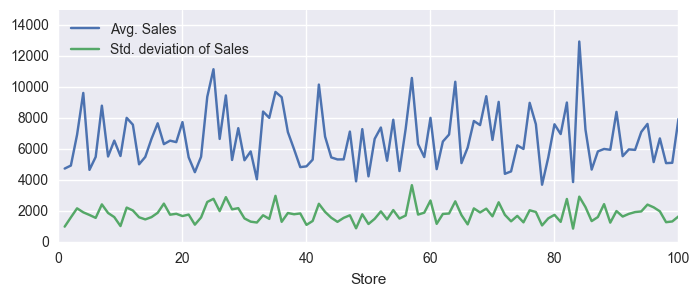

In [14]:
plt.figure(figsize(8,3))
data.groupby('Store')['Sales'].mean().plot(xlim = (0,100), ylim=(3000,15000), legend = True, label = 'Avg. Sales')
data.groupby('Store')['Sales'].std().plot(xlim = (0,100), ylim=(0,15000), legend = True, label = 'Std. deviation of Sales')

There seems to be large variations in average sales depending on the store. It might have to do with where they are located.
Urban stores might do more sales than rural stores

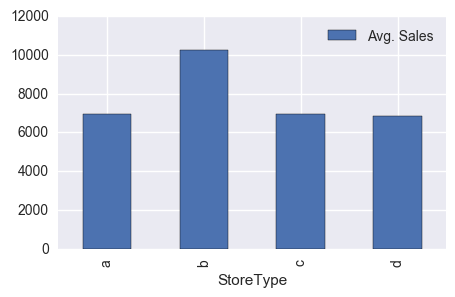

In [16]:
# Lets look at average sales for each store type
plt.figure(figsize(5,3))
data.groupby('StoreType')['Sales'].mean().plot(kind = 'bar', legend = True, label = 'Avg. Sales')

There seems to be some variation in sales on store type

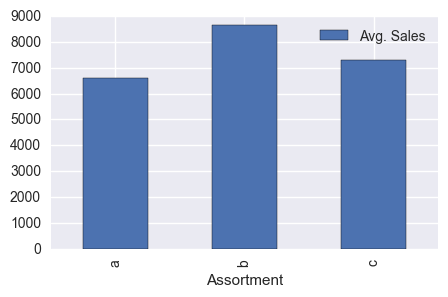

In [17]:
#Lets look at sales as function of assortments
plt.figure(figsize(5,3))
data.groupby('Assortment')['Sales'].mean().plot(kind = 'bar', legend = True, label = 'Avg. Sales')

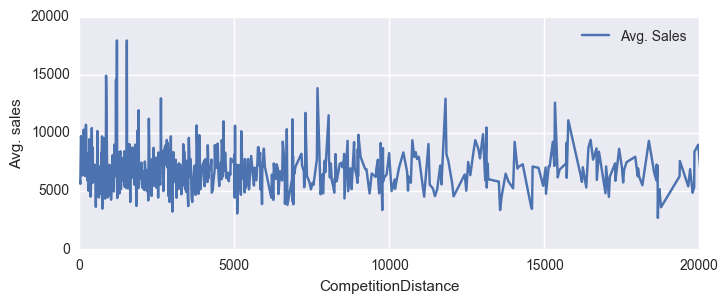

In [18]:
# Lets look at average sales as a function of competition distance - this might say something about competition
plt.figure(figsize(8,3))
data.groupby('CompetitionDistance')['Sales'].mean().plot(xlim = (0,20000), ylim = (0,20000), legend = True, label = 'Avg. Sales')
plt.ylabel('Avg. sales')

There is no clear indication that competition distance matters in how much sales each store has..

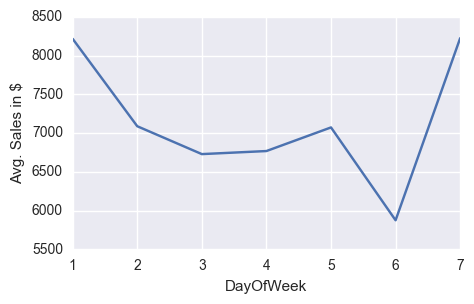

In [19]:
# Now lets look at sales as a function of day of the week 
plt.figure(figsize(5,3))
data.groupby('DayOfWeek')['Sales'].mean().plot().set_ylabel("Avg. Sales in $")

In [20]:
data.groupby(['DayOfWeek', 'Open'])['Open'].size()

DayOfWeek  Open
1          1       137557
2          1       143955
3          1       141922
4          1       134626
5          1       138633
6          1       144052
7          1         3593
dtype: int64

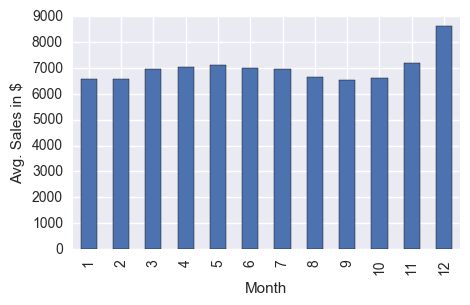

In [21]:
# Sales vs month in a year 
data['Date_month'] = pd.to_datetime(data['Date']).dt.month
data.groupby('Date_month')['Sales'].mean().plot(kind='bar').set_ylabel('Avg. Sales in $')
plt.xlabel('Month')

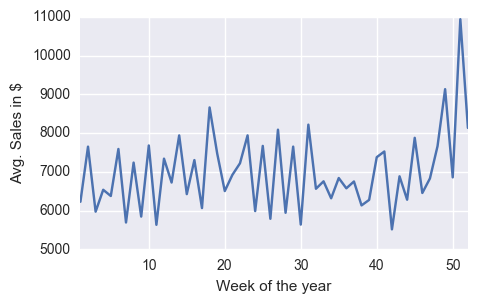

In [22]:
# How about week of the year?
data['Date_week'] = pd.to_datetime(data['Date']).dt.weekofyear
data.groupby('Date_week')['Sales'].mean().plot().set_ylabel('Avg. Sales in $')
plt.xlabel('Week of the year')

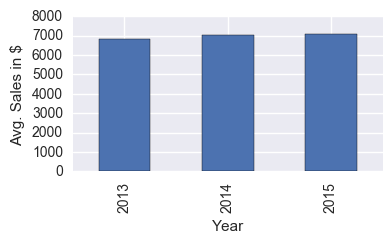

In [23]:
# Lets look at the yearly sales
plt.figure(figsize(4,2))
data['Date_Year'] = pd.to_datetime(data['Date']).dt.year
data.groupby('Date_Year')['Sales'].mean().plot(kind='bar').set_ylabel('Avg. Sales in $')
plt.xlabel('Year')

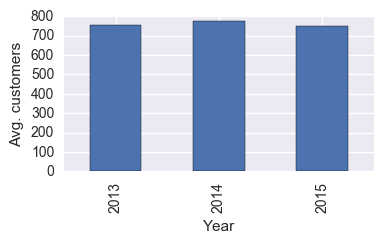

In [24]:
# Lets look at the avg. customers in a given year
plt.figure(figsize(4,2))
data['Date_Year'] = pd.to_datetime(data['Date']).dt.year
data.groupby('Date_Year')['Customers'].mean().plot(kind='bar').set_ylabel('Avg. customers')
plt.xlabel('Year')

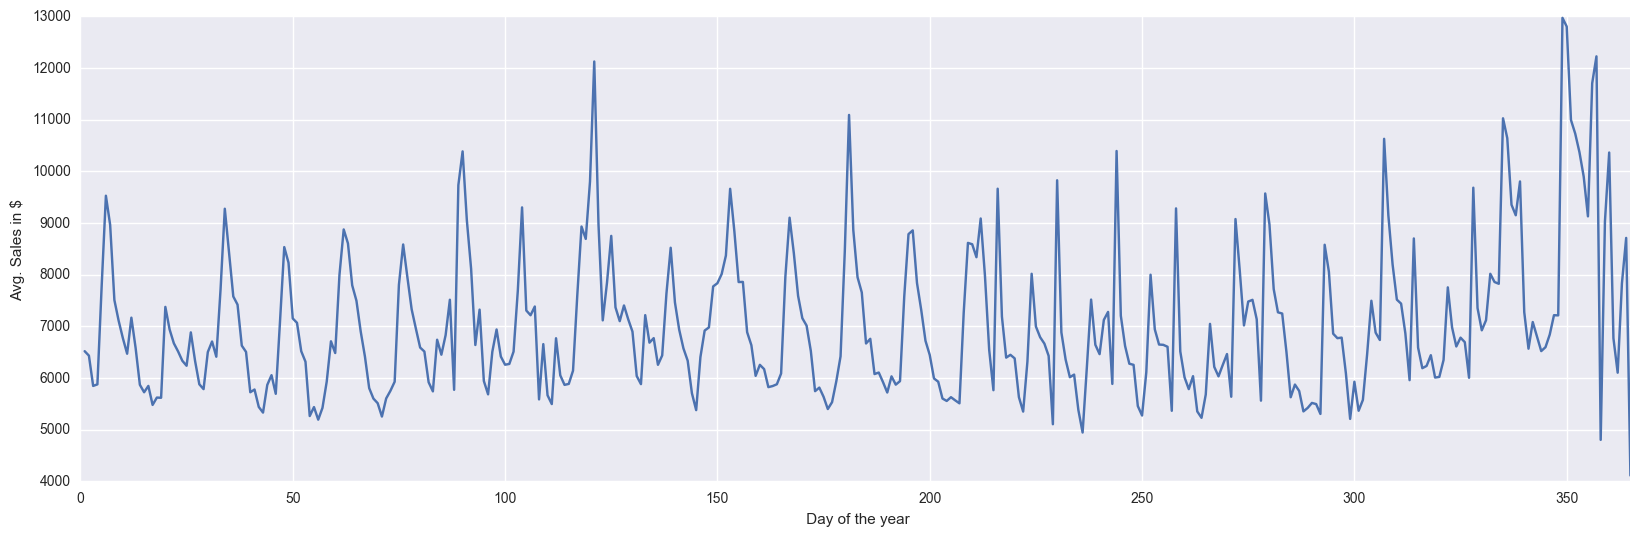

In [25]:
# Lets look at the avg. sales day-by-day
plt.figure(figsize(20,6))
data['Date_day'] = pd.to_datetime(data['Date']).dt.dayofyear
data.groupby('Date_day')['Sales'].mean().plot(xlim=(0,365))
plt.ylabel('Avg. Sales in $')
plt.xlabel(' Day of the year')

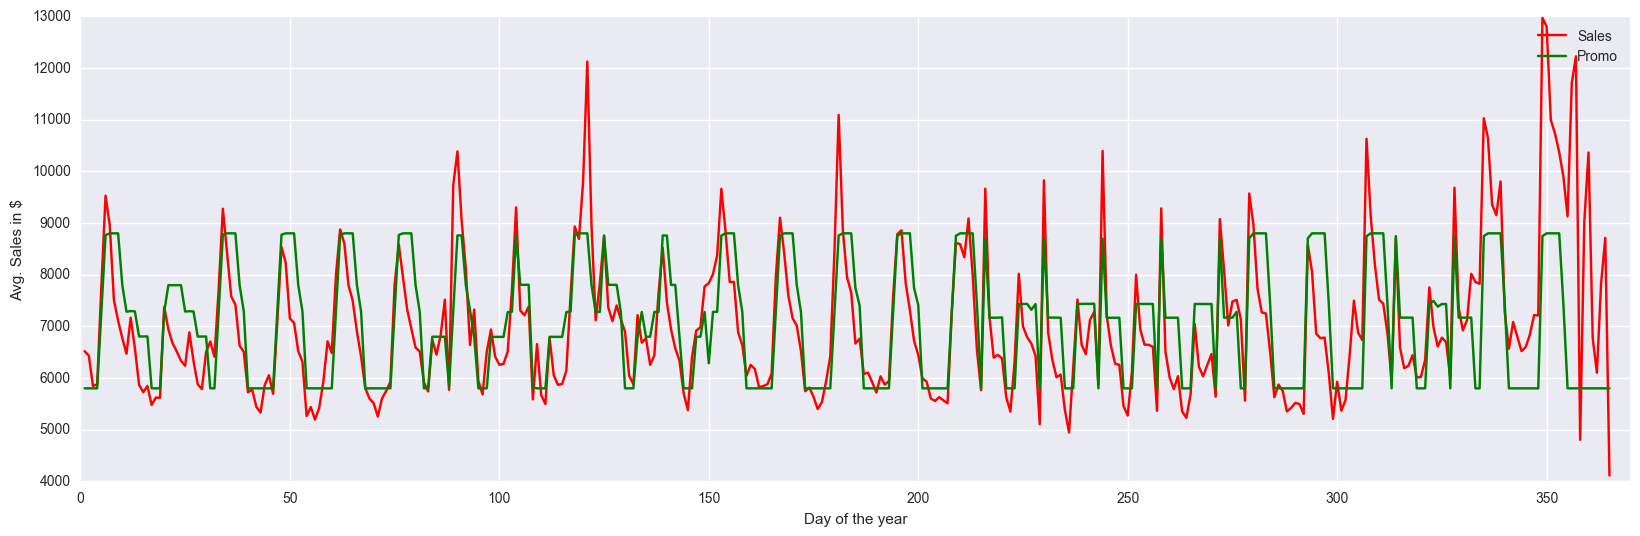

In [28]:
# Lets look the daily sales when there are promotions 
plt.figure(figsize(20,6))
x = data.groupby('Date_day')['Date_day'].mean()
y = data.groupby('Date_day')['Sales'].mean()
z = 5800+3000*data.groupby('Date_day')['Promo'].mean()
plt.plot(x,y,color = 'red', label = 'Sales')
plt.plot(x,z, color = 'green', label = 'Promo')
plt.legend()
plt.xlim([0,370])
plt.ylabel('Avg. Sales in $')
plt.xlabel('Day of the year')

### It seems like promotions are highly correlated to sales - makes sense!

6934.631986648479

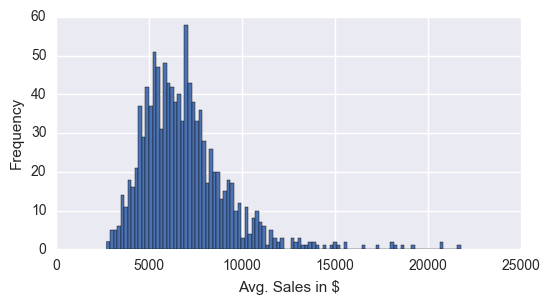

In [29]:
plt.figure(figsize(6,3))
data.groupby('Store')['Sales'].mean().plot.hist(bins=100).set_xlabel("Avg. Sales in $")
data.groupby('Store')['Sales'].mean().mean()

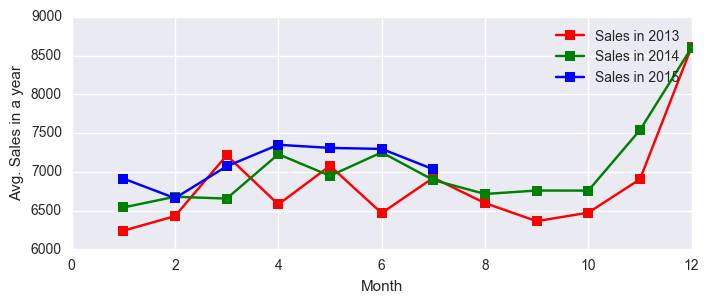

In [30]:
# Lets look at avg. sales monthly for all three years 
plt.figure(figsize(8,3))
y1 = data.loc[data['Date_Year'] == 2013].groupby('Date_month')['Sales'].mean()
y2 = data.loc[data['Date_Year'] == 2014].groupby('Date_month')['Sales'].mean()
y3 = data.loc[data['Date_Year'] == 2015].groupby('Date_month')['Sales'].mean()
x = [1,2,3,4,5,6,7,8,9,10,11,12]
x1 = [1,2,3,4,5,6,7]
#x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(x,y1,marker = 's', color = 'red', label = 'Sales in 2013')
plt.plot(x,y2,marker = 's',color = 'green', label = 'Sales in 2014')
plt.plot(x1,y3,marker = 's',color = 'blue', label = 'Sales in 2015')
plt.legend()
plt.ylabel('Avg. Sales in a year')
plt.xlabel('Month')

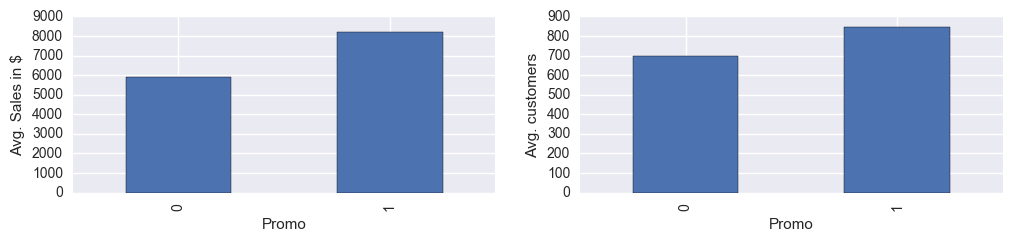

In [31]:
# How about average sales and number of customers when there are promotions and not  
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
plt.subplot(221)
data.groupby('Promo')['Sales'].mean().plot(kind='bar').set_ylabel('Avg. Sales in $')
plt.subplot(222)
data.groupby('Promo')['Customers'].mean().plot(kind='bar').set_ylabel('Avg. customers')
plt.xlabel('Promo')


Clearly, promotions bump the average sales and average number of customers shopping

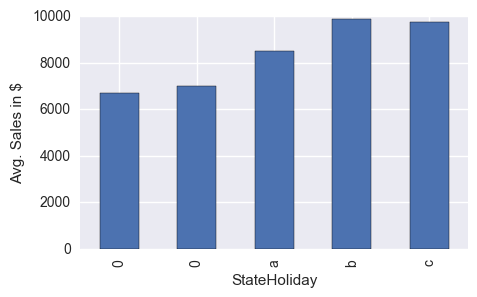

In [32]:
# Sales when there are state holidays
plt.figure(figsize(5,3))
data.groupby('StateHoliday')['Sales'].mean().plot(kind='bar').set_ylabel('Avg. Sales in $')

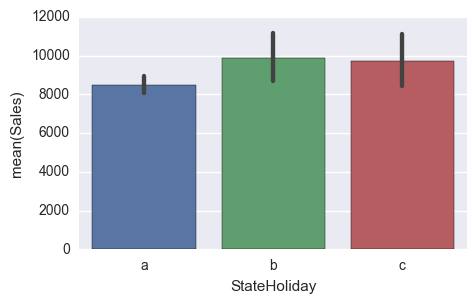

In [33]:
# Lets look closely for three types of holidays 
mask = ((data["StateHoliday"] != 0) & (data["StateHoliday"] != "0"))
sns.barplot(x='StateHoliday', y='Sales', data=data[mask])

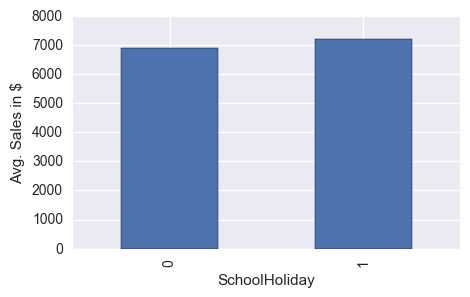

In [34]:
# How about school holidays 
data.groupby('SchoolHoliday')['Sales'].mean().plot(kind='bar').set_ylabel('Avg. Sales in $')

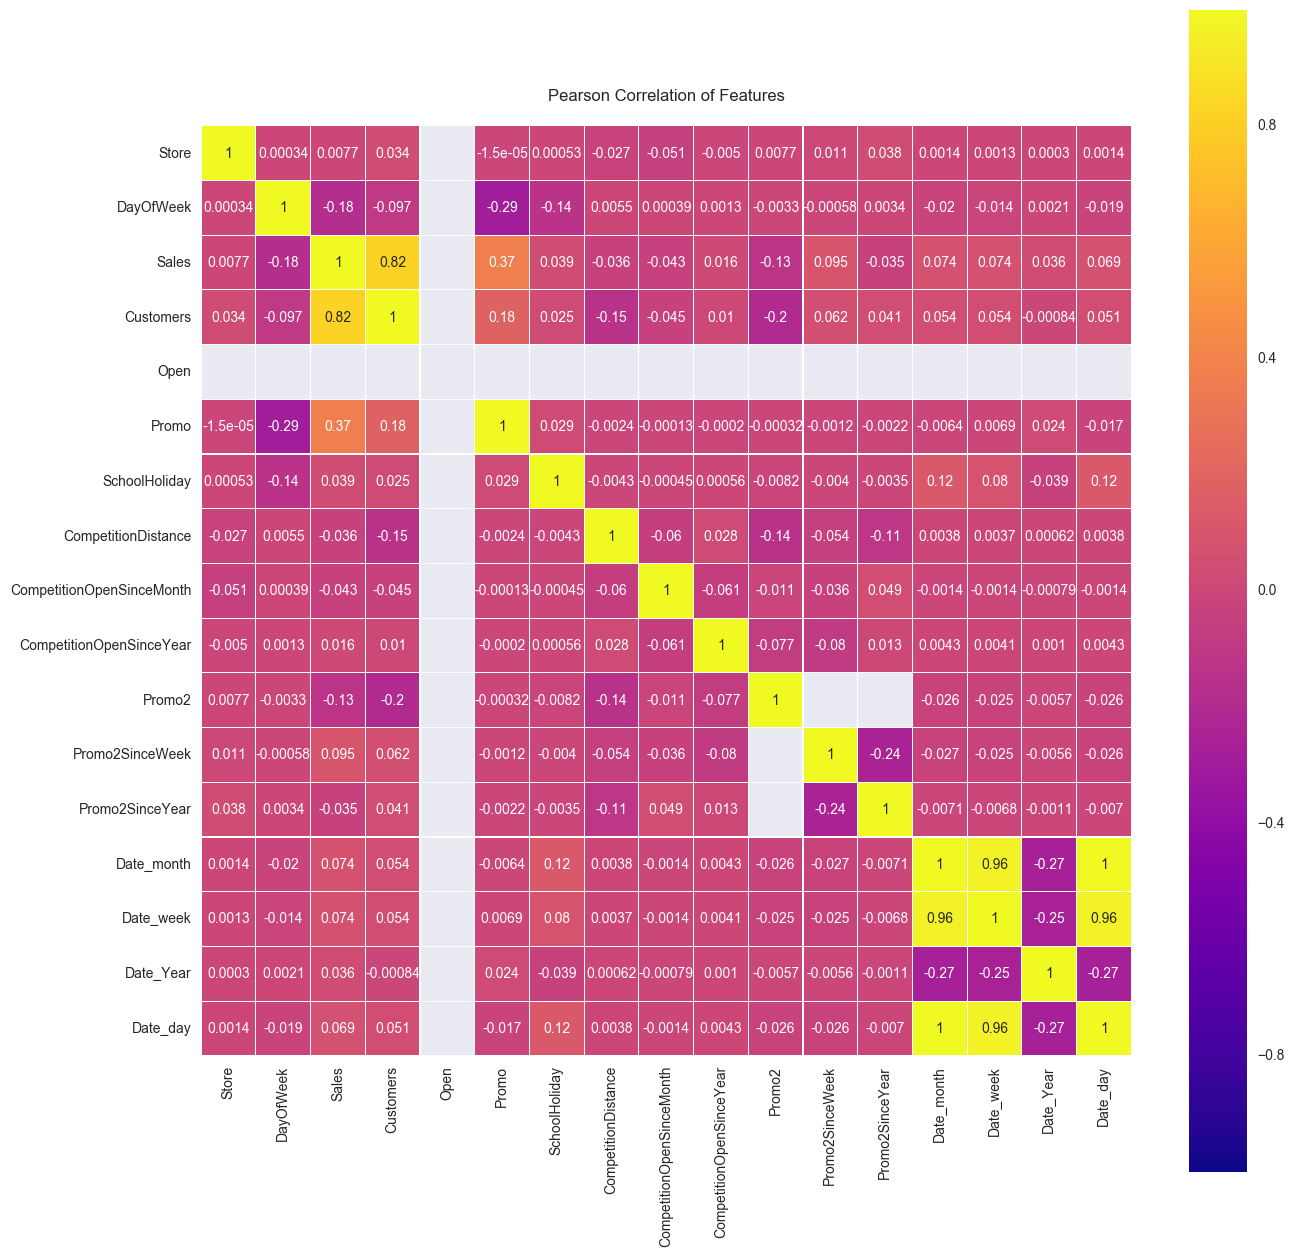

In [35]:
# Lets look at the correlations between features
colormap = plt.cm.plasma
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.02, size=12)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## Feature engineering

In [43]:
# We will encode StorType and Assortment with numerical values

# Training set
st_dic = {'a': 1, 'b': 2, 'c': 3, 'd': 4}
as_dic = {'a': 1, 'b': 2, 'c': 3, 'd': 4}
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Day'] = pd.to_datetime(data['Date']).dt.day
data['StoreType1'] = data['StoreType'].map(st_dic).astype(int)
data['Assortment1'] = data['Assortment'].map(as_dic).astype(int)
     

# Test set
test['Year'] = pd.to_datetime(test['Date']).dt.year
test['Month'] = pd.to_datetime(test['Date']).dt.month
test['Day'] = pd.to_datetime(test['Date']).dt.day
test['StoreType1'] = test['StoreType'].map(st_dic).astype(int)
test['Assortment1'] = test['Assortment'].map(as_dic).astype(int)

# We will drop several other features which are not very important

In [47]:
test.head().T

,0,1,2,3,4
Id,1,857,1713,2569,3425
Store,1,1,1,1,1
DayOfWeek,4,3,2,1,7
Date,2015-09-17,2015-09-16,2015-09-15,2015-09-14,2015-09-13
Open,1,1,1,1,0
Promo,1,1,1,1,0
StateHoliday,0,0,0,0,0
SchoolHoliday,0,0,0,0,0
StoreType,c,c,c,c,c
Assortment,a,a,a,a,a


In [45]:
data.head().T

,0,1,2,3,4
Store,353,353,353,353,353
DayOfWeek,2,3,4,5,6
Date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05
Sales,3139,2686,2628,2677,2224
Customers,820,835,815,856,719
Open,1,1,1,1,1
Promo,0,0,0,0,0
StateHoliday,a,0,0,0,0
SchoolHoliday,1,1,1,1,0
StoreType,b,b,b,b,b


Now we are ready for putting this together for building our predictive model..